In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [203]:
# Data for prices of USD/JPY, gold, WTI oil and nikkei225 index for the period from 9-Apr-1990 to 8-May-2020
# Excess 1 month data was obtained, for further calculations use using talib

# Load data from csv file
df = pd.read_csv('dataset_before_preprocessing.csv')
df['date'] = pd.to_datetime(df['Date1'])
df = df.drop('Date1', axis=1)

In [204]:
# Fill any N/A with the value in its previous row value
df = df.fillna(method='bfill')

### EDA and data visualization

<AxesSubplot:xlabel='date', ylabel='nikkei_close'>

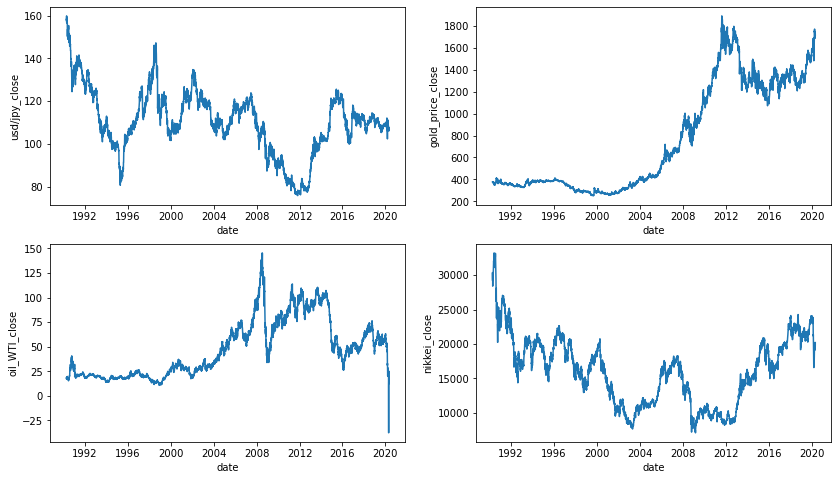

In [205]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
sns.lineplot(data=df, x='date', y='usd/jpy_close', ax=ax[0,0], palette='blue')
sns.lineplot(data=df, x='date', y='gold_price_close', ax=ax[0,1], palette='orange')
sns.lineplot(data=df, x='date', y='oil_WTI_close', ax=ax[1,0], palette='brown')
sns.lineplot(data=df, x='date', y='nikkei_close', ax=ax[1,1], palette='black')

<AxesSubplot:xlabel='usd/jpy_%', ylabel='nikkei_%'>

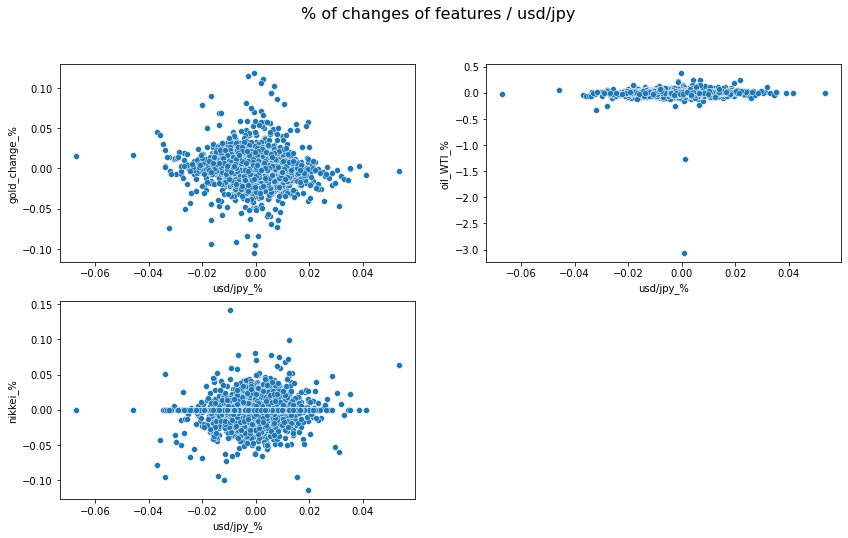

In [206]:
# Before dropping outliers due to Covid-19
fig, ax = plt.subplots(2,2, figsize=(14,8))
fig.suptitle('% of changes of features / usd/jpy', fontsize=16)
ax[1,1].axis('off')
sns.scatterplot(data=df, x='usd/jpy_%', y='gold_change_%', ax=ax[0,0], palette='orange')
sns.scatterplot(data=df, x='usd/jpy_%', y='oil_WTI_%', ax=ax[0,1], palette='brown')
sns.scatterplot(data=df, x='usd/jpy_%', y='nikkei_%', ax=ax[1,0], palette='black')

In [208]:
# drop the outliers due to the impace of Covid-19
oil_outlier = df[df['oil_WTI_%']<-1].index     
df = df.drop(oil_outlier, axis=0)             

<AxesSubplot:xlabel='usd/jpy_%', ylabel='nikkei_%'>

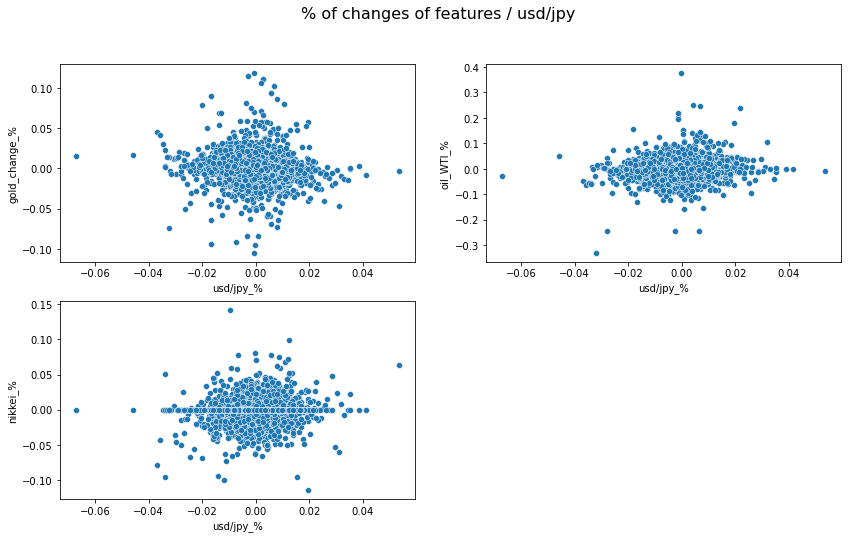

In [209]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
fig.suptitle('% of changes of features / usd/jpy', fontsize=16)
ax[1,1].axis('off')
#sns.lineplot(data=df, x='usd/jpy_%', y='usd/jpy_close', ax=ax[0,0], palette='blue')
sns.scatterplot(data=df, x='usd/jpy_%', y='gold_change_%', ax=ax[0,0], palette='orange')
sns.scatterplot(data=df, x='usd/jpy_%', y='oil_WTI_%', ax=ax[0,1], palette='brown')
sns.scatterplot(data=df, x='usd/jpy_%', y='nikkei_%', ax=ax[1,0], palette='black')

<AxesSubplot:xlabel='usd/jpy_close', ylabel='nikkei_close'>

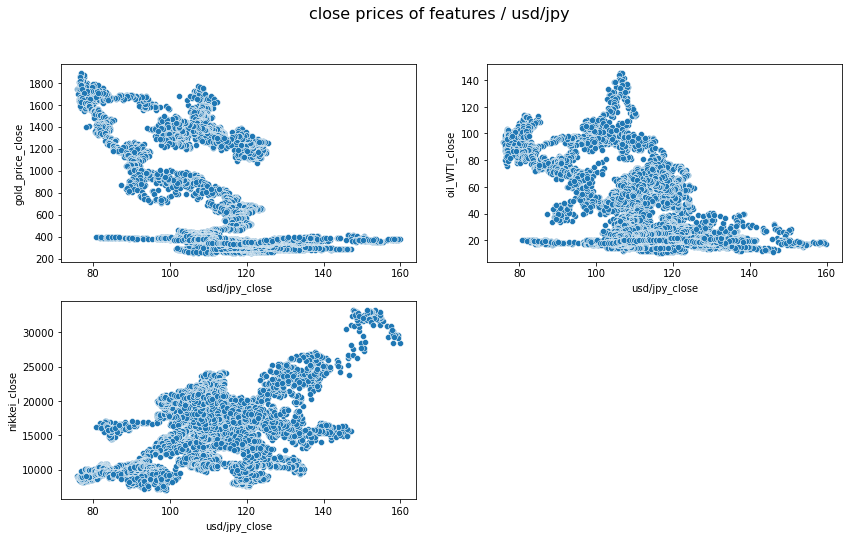

In [210]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
fig.suptitle('close prices of features / usd/jpy', fontsize=16)
ax[1,1].axis('off')
sns.scatterplot(data=df, x='usd/jpy_close', y='gold_price_close', ax=ax[0,0], palette='orange')
sns.scatterplot(data=df, x='usd/jpy_close', y='oil_WTI_close', ax=ax[0,1], palette='brown')
sns.scatterplot(data=df, x='usd/jpy_close', y='nikkei_close', ax=ax[1,0], palette='black')

In [211]:
df = df.set_index('date')

In [212]:
df = df.sort_index()

In [213]:
# Import talib for calculating index indicators
import talib

df['usd/jpy_rsi'] = talib.RSI(df['usd/jpy_close'], timeperiod=14)
df['gold_price_rsi'] = talib.RSI(df['gold_price_close'], timeperiod=14)
df['oil_WTI_rsi'] = talib.RSI(df['oil_WTI_close'], timeperiod=14)
df['nikkei_rsi'] = talib.RSI(df['nikkei_close'], timeperiod=14)

In [214]:
df['usd/jpy_ema5'] = talib.EMA(df['usd/jpy_close'], timeperiod=5)
df['gold_price_ema5'] = talib.EMA(df['gold_price_close'], timeperiod=5)
df['oil_WTI_ema5'] = talib.EMA(df['oil_WTI_close'], timeperiod=5)
df['nikkei_ema5'] = talib.EMA(df['nikkei_close'], timeperiod=5)

In [215]:
df['usd/jpy_ema20'] = talib.EMA(df['usd/jpy_close'], timeperiod=20)
df['gold_price_ema20'] = talib.EMA(df['gold_price_close'], timeperiod=20)
df['oil_WTI_ema20'] = talib.EMA(df['oil_WTI_close'], timeperiod=20)
df['nikkei_ema20'] = talib.EMA(df['nikkei_close'], timeperiod=20)

In [216]:
df = df[['usd/jpy_close','usd/jpy_%','usd/jpy_rsi','usd/jpy_ema5','usd/jpy_ema20','gold_price_close','gold_change_%','gold_price_rsi','gold_price_ema5','gold_price_ema20','oil_WTI_close','oil_WTI_%','oil_WTI_rsi','oil_WTI_ema5','oil_WTI_ema20','nikkei_close','nikkei_%','nikkei_rsi','nikkei_ema5','nikkei_ema20']]

In [217]:
df = df.drop('nikkei_%', axis= 1)   # drop the column contains too many nan values

In [218]:
df

,usd/jpy_close,usd/jpy_%,gold_price_close,gold_change_%,oil_WTI_close,oil_WTI_%,nikkei_close,usd/jpy_rsi,gold_price_rsi,oil_WTI_rsi,nikkei_rsi
date,,,,,,,,,,,
1990-04-09,158.22,0.0035,376.0,-0.0123,18.44,-0.0371,29297.73047,NaN,NaN,NaN,NaN
1990-04-10,157.75,-0.0030,375.0,-0.0027,17.68,-0.0412,30382.91992,NaN,NaN,NaN,NaN
1990-04-11,158.05,0.0019,374.3,-0.0019,18.06,0.0215,29654.49023,NaN,NaN,NaN,NaN
1990-04-12,158.15,0.0006,375.9,0.0043,17.78,-0.0155,29457.25977,NaN,NaN,NaN,NaN
1990-04-13,158.69,0.0034,375.9,0.0000,17.78,0.0000,29586.27930,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,106.75,-0.0019,1713.3,0.0073,20.39,0.0308,19619.35000,41.755066,54.076939,48.054887,51.816260
2020-05-05,106.60,-0.0014,1710.6,-0.0016,24.56,0.2045,19619.35000,40.687770,53.491538,55.721240,51.816260
2020-05-06,106.15,-0.0041,1688.5,-0.0129,23.99,-0.0232,19619.35000,37.584032,48.831838,54.536415,51.816260


In [219]:
df.isna().sum()

usd/jpy_close        0
usd/jpy_%            0
gold_price_close     0
gold_change_%        0
oil_WTI_close        0
oil_WTI_%            0
nikkei_close         0
usd/jpy_rsi         14
gold_price_rsi      14
oil_WTI_rsi         14
nikkei_rsi          14
dtype: int64

In [220]:
# drop all rows with N/A value
df = df.dropna(how='any', axis=0)

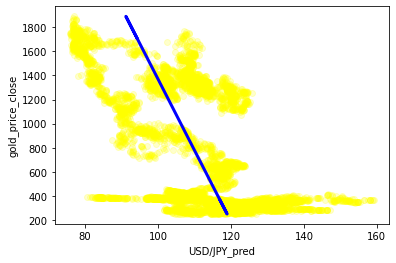

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
Lin = LinearRegression()
Lin.fit(np.array(df['gold_price_close']).reshape(-1,1), df['usd/jpy_close'])
y_pred_lin1 = Lin.predict(np.array(df['gold_price_close']).reshape(-1,1))
plt.scatter(df['usd/jpy_close'], np.array(df['gold_price_close']).reshape(-1,1),  color='yellow', alpha=0.2)
plt.plot(y_pred_lin1, np.array(df['gold_price_close']).reshape(-1,1), color='blue', linewidth=3)

plt.ylabel('gold_price_close')
plt.xlabel('USD/JPY_pred')
plt.show()

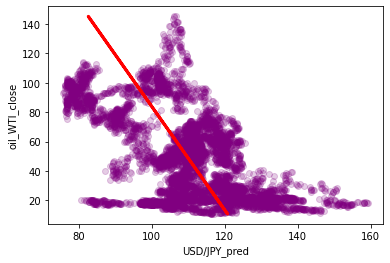

In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
Lin = LinearRegression()
Lin.fit(np.array(df['oil_WTI_close']).reshape(-1,1), df['usd/jpy_close'])
y_pred_lin1 = Lin.predict(np.array(df['oil_WTI_close']).reshape(-1,1))
plt.scatter(df['usd/jpy_close'], np.array(df['oil_WTI_close']).reshape(-1,1),  color='purple', alpha=0.2)
plt.plot(y_pred_lin1, np.array(df['oil_WTI_close']).reshape(-1,1), color='red', linewidth=3)

plt.ylabel('oil_WTI_close')
plt.xlabel('USD/JPY_pred')
plt.show()

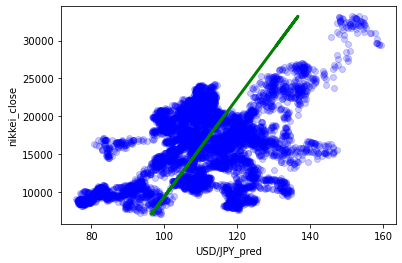

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
Lin = LinearRegression()
Lin.fit(np.array(df['nikkei_close']).reshape(-1,1), df['usd/jpy_close'])
y_pred_lin1 = Lin.predict(np.array(df['nikkei_close']).reshape(-1,1))
plt.scatter(df['usd/jpy_close'], np.array(df['nikkei_close']).reshape(-1,1),  color='blue', alpha=0.2)
plt.plot(y_pred_lin1, np.array(df['nikkei_close']).reshape(-1,1), color='green', linewidth=3)

plt.ylabel('nikkei_close')
plt.xlabel('USD/JPY_pred')
plt.show()

In [224]:
# Further drop columns to prevent Multi-collenarity that affect the prediction to predictors
df = df.drop('usd/jpy_ema5', axis = 1)
df = df.drop('usd/jpy_ema20', axis = 1)
df = df.drop('gold_price_ema5', axis = 1)
df = df.drop('gold_price_ema20', axis = 1)
df = df.drop('oil_WTI_ema5', axis = 1)
df = df.drop('oil_WTI_ema20', axis = 1)
df = df.drop('nikkei_ema5', axis = 1)
df = df.drop('nikkei_ema20', axis = 1)
df = df.drop('usd/jpy_%', axis = 1)
df = df.drop('gold_change_%', axis = 1)
df = df.drop('oil_WTI_%', axis = 1)
# drop nikkei as well after negative r2 score were obtained.
df = df.drop('nikkei_close', axis = 1)
df = df.drop('nikkei_rsi', axis = 1)

<AxesSubplot:>

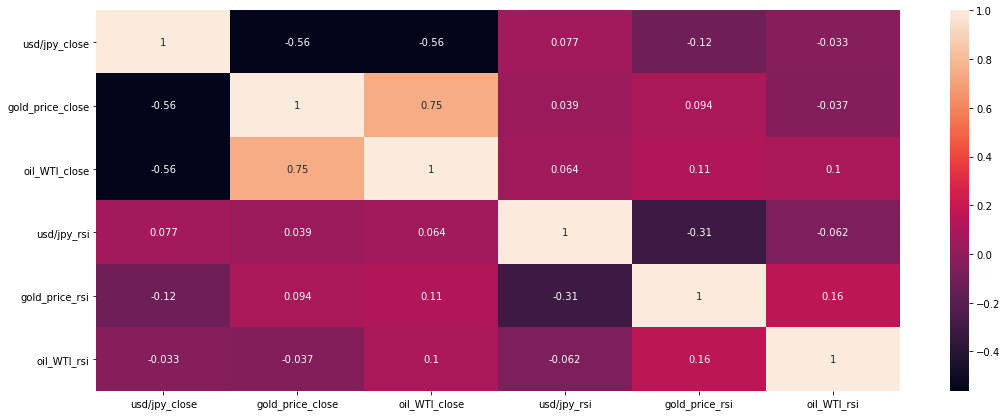

In [225]:
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(), annot=True)

In [226]:
# Split the predictors and features for machine-learning.
# 1st Part of Dataframe
df_1 = df.loc['1990-05-04':'2015-05-03']

In [227]:
# 2nd Part of Dataframe
df_2 = df.loc['2015-05-04':'2020-05-08']

In [228]:
# Split to the train, test datasets
x_train = df_1.iloc[:, 1:]
x_test = df_2.iloc[:, 1:]
y_train = np.array(df_1.iloc[:, 0]).reshape(-1,1)
y_test = np.array(df_2.iloc[:, 0]).reshape(-1,1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6491, 5)
(1308, 5)
(6491, 1)
(1308, 1)


In [229]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
x_train = MinMax.fit_transform(x_train)
x_test = MinMax.fit_transform(x_test)
y_train = MinMax.fit_transform(y_train)
y_test = MinMax.fit_transform(y_test)

In [230]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import math
regr_dt = DecisionTreeRegressor(max_depth=3)
regr_dt.fit(x_train, y_train)
y_pred_dt = regr_dt.predict(x_test)
y_pred_dt = y_pred_dt.reshape(-1, 1)

print(explained_variance_score(y_test, y_pred_dt))
print(mean_squared_error(y_test, y_pred_dt))
print(r2_score(y_test, y_pred_dt))

0.35602446037516433
0.03906844537490275
0.05779259787210467


In [231]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rnd_clf = RandomForestRegressor(n_estimators=400, 
                                max_leaf_nodes=10, 
                                n_jobs=-1, 
                                random_state=42, 
                                max_depth=3)
#rnd_clf.fit(x_train, y_train.reshape(-1, 1))
rnd_clf.fit(x_train, y_train.ravel())

y_pred_rf = rnd_clf.predict(x_test)

print(explained_variance_score(y_test, y_pred_rf))
print(mean_squared_error(y_test, y_pred_rf))
print(r2_score(y_test, y_pred_rf))

0.3943073094570685
0.03824334701757099
0.07769136201031002


In [232]:
import xgboost as xgb
xgb_model = xgb.XGBRFRegressor(random_state=40)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

In [233]:
print(explained_variance_score(y_test, y_pred_xgb))
print(mean_squared_error(y_test, y_pred_xgb))
print(r2_score(y_test, y_pred_xgb))

0.4415026080909842
0.031158071743861405
0.24856580415771634


<AxesSubplot:title={'center':'Feature importance - Cover'}, xlabel='F score', ylabel='Features'>

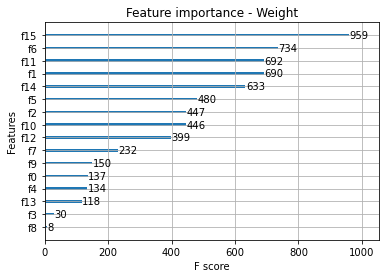

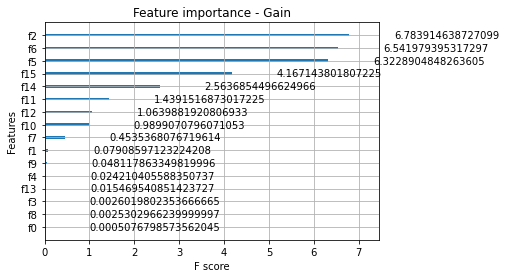

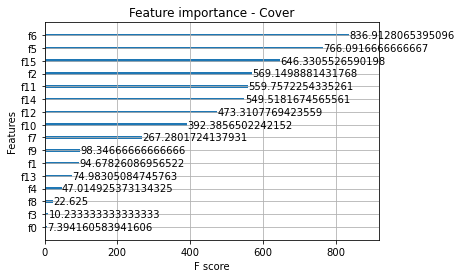

In [39]:
xgb.plot_importance(xgb_model, title='Feature importance - Weight')
xgb.plot_importance(xgb_model, importance_type='gain',title='Feature importance - Gain')
xgb.plot_importance(xgb_model, importance_type='cover',title='Feature importance - Cover')

In [39]:
from sklearn.model_selection import GridSearchCV                                                    #DecisionTree CV
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

clf = GridSearchCV(estimator=regr_dt, param_grid=parameters)
clf.fit(x_train, y_train)

print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

-0.6934806908961015
{'max_depth': 3}
DecisionTreeRegressor(max_depth=3)


In [40]:
from sklearn.model_selection import GridSearchCV                                                    #Xgboost CV
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

clf = GridSearchCV(estimator=xgb_model, param_grid=parameters)
clf.fit(x_train, y_train)

print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

-0.5771465885626124
{'max_depth': 3}
XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', random_state=40, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)
